In [271]:
"""we think that going green and being modern can be very expensive, 
as we have seen that cars use more petrol than they used to for each trip"""

# ----> but is E10 cheaper than SP98!
# what makes the 'best' combustible???

'we think that going green and being modern can be very expensive, \nas we have seen that cars use more petrol than they used to for each trip'

In [272]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [273]:
# files contain same info so we take the file with already right dtypes

In [274]:
data = pd.read_excel('data/measurements2.xlsx')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [275]:
display(data.specials.value_counts())

# drop specials, because they are already encoded (AC, rain, sun)

data = data.drop(['specials'], axis=1)

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [276]:
data.isna().mean()

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.966495
refill gas       0.966495
dtype: float64

In [279]:
# H0: E10 consume = SP98 consume
# H1: E10 consume > SP98 consume

from scipy import stats
fuel_a = data[data["gas_type"]=="E10"]['consume']
fuel_b = data[data["gas_type"]=="SP98"]['consume']

print(stats.ttest_ind(fuel_a, fuel_b, alternative="greater"))
# P_value:0.3816452423051032 is larger than 0.05 ---> H1 is not supported.

print(stats.ttest_ind(fuel_a*1.38, fuel_b*1.46, alternative="less"))
# P_value:0.01160724138852348 is less than 0.05 ---> E10 cost less.

# There is not enough evidence to confirm E10 consume more, but it indeed cheaper than SP98

Ttest_indResult(statistic=0.3011626300254617, pvalue=0.38172632393141837)
Ttest_indResult(statistic=-2.2698862964016047, pvalue=0.01188264093212125)


In [233]:
# we can drop refill columns, because they are not important for our analysis AND have >96% NaN

data = data.drop(['refill liters', 'refill gas'], axis=1)

<AxesSubplot: >

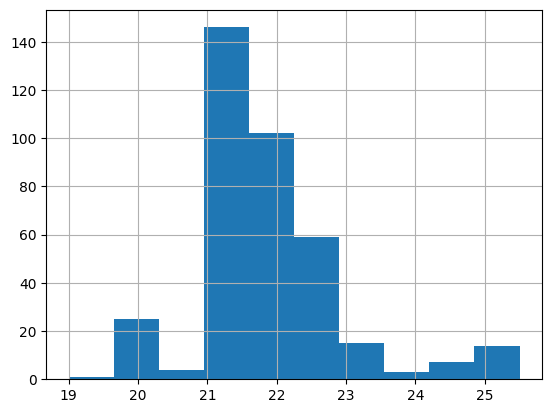

In [234]:
# we fill the temp_inside NaNs 

data['temp_inside'].isna().sum() # 12 nans

data['temp_inside'].hist()

In [235]:
# we fill with the mean value

data['temp_inside'] = data['temp_inside'].fillna(data['temp_inside'].mean())
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

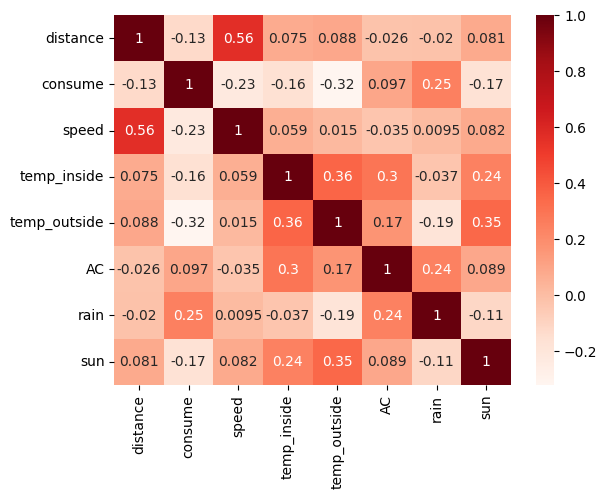

In [236]:
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.show()

In [237]:
# we see correlation between dist and speed and will investigate

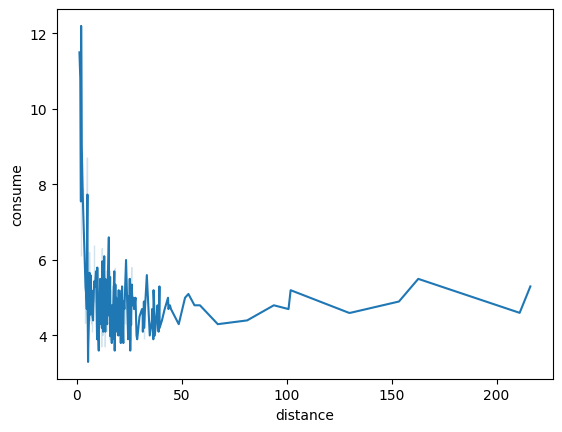

<AxesSubplot: xlabel='speed', ylabel='consume'>

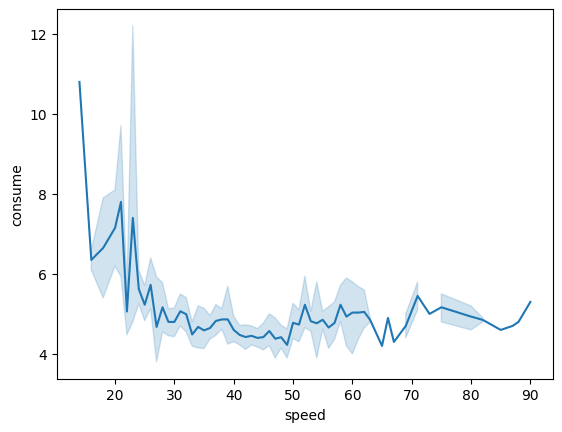

In [238]:
# look into dist / speed distribution

sns.lineplot(data=data, x='distance', y='consume')
plt.show()
sns.lineplot(data=data, x='speed', y='consume')

In [239]:
# we create a new measure for the pace of the drive (the higher the faster)

data['pace'] =  data['speed'] / data['distance']

<AxesSubplot: xlabel='pace', ylabel='consume'>

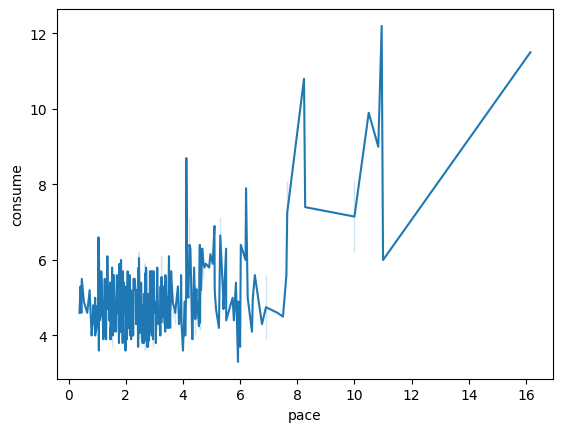

In [240]:
sns.lineplot(x='pace', y='consume', data=data)

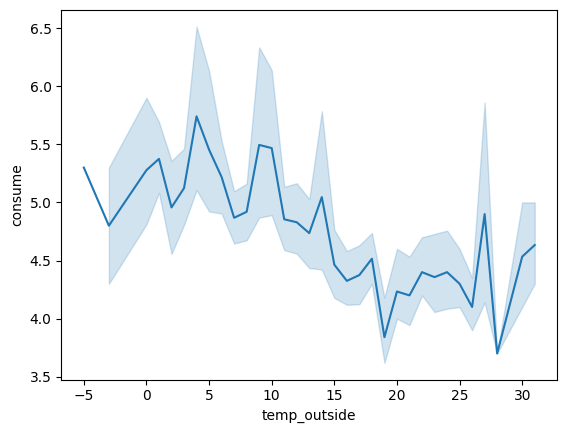

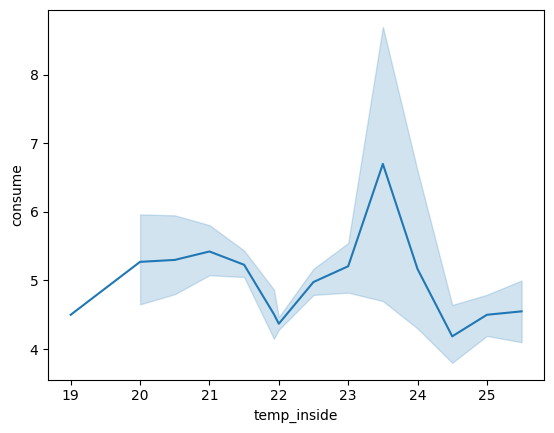

In [241]:
# next we look into temperature conditions

sns.lineplot(x='temp_outside', y='consume', data=data)
plt.show()
sns.lineplot(x='temp_inside', y='consume', data=data)
plt.show()

In [242]:
# again we create a new measure for how much the car temp has changed compared to outside

data['temp_diff'] = data['temp_inside'] - data['temp_outside']

<AxesSubplot: xlabel='temp_diff', ylabel='consume'>

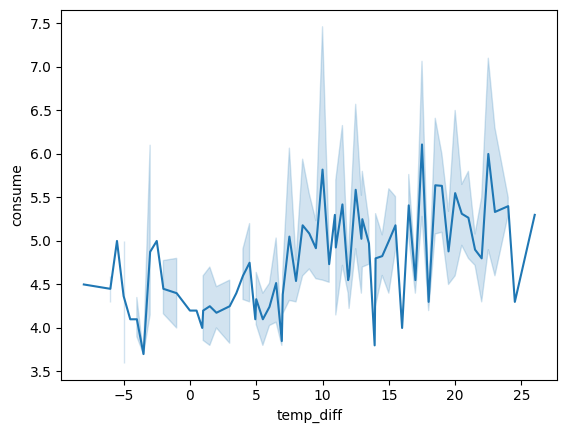

In [243]:
sns.lineplot(x='temp_diff', y='consume', data=data)

In [244]:
# now we can drop distance, speed, temp inside & outside

data = data.drop(['distance', 'speed', 'temp_inside', 'temp_outside'], axis=1)
data

,consume,gas_type,AC,rain,sun,pace,temp_diff
0,5.0,E10,0,0,0,0.928571,9.5
1,4.2,E10,0,0,0,2.500000,8.5
2,5.5,E10,0,0,0,3.392857,6.5
3,3.9,E10,0,0,0,2.790698,7.5
4,4.5,E10,0,0,0,2.486486,6.5
...,...,...,...,...,...,...,...
383,3.7,SP98,0,0,0,2.437500,6.5
384,4.3,SP98,1,0,0,2.360248,-6.0
385,3.8,SP98,0,0,0,2.812500,6.0
386,4.6,SP98,1,0,0,2.727273,-6.0


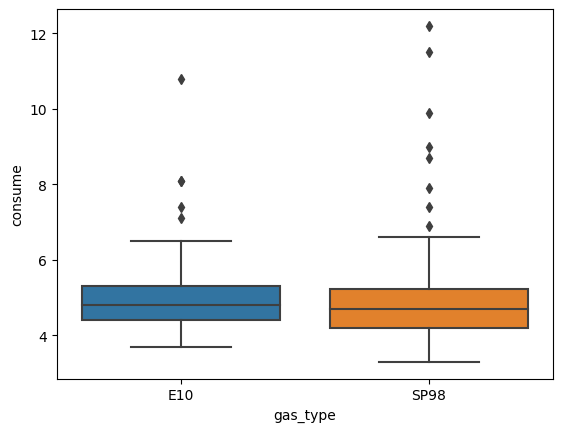

In [245]:
sns.boxplot(data=data, x='gas_type', y='consume')
plt.show()

In [246]:
# it seems at first sight E10 really is consuming a little more than SP98

In [247]:
# but lets go deeper:

import plotly.express as px
fig = px.scatter_3d(data, x='temp_diff', y='pace', z='consume',
              color='gas_type', opacity=0.7)

fig.show()

In [248]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [249]:
# we see now that that actual the SP98 has the high consumptions, while E10 only holds the higher overall quartiles (boxplot)
# but 

# also: we have more SP98 samples, than E10
# resampling (either programmatically or manually by doing E10 trips) could lead to other results 

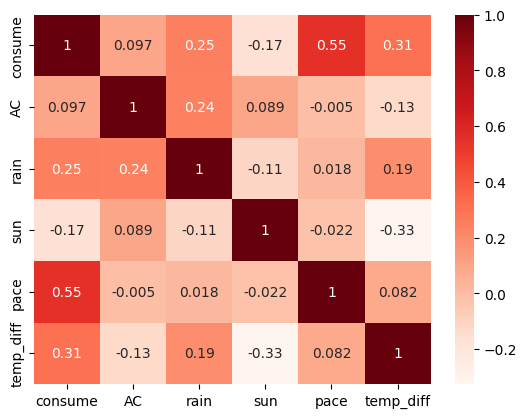

In [250]:
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.show()

In [251]:
# we were able to transfer multicollinearity into high target correlation!

In [252]:
# classification for gas_type directly doesn't realy make sense, 
# because the conditions (temp,pace,specials) also have reasonable impact

In [253]:
# we handle some outliers
print(len(data))
data = data[data['pace'] < 9]
print(len(data))

388
381


In [254]:
# but lets go deeper:

import plotly.express as px
fig = px.scatter_3d(data, x='temp_diff', y='pace', z='consume',
              color='gas_type', opacity=0.7)

fig.show()

In [255]:
# in order to find the best combustible, we build a regression model, 
# that predicts the consume of a particular trip
# we can than compare the results for E10 and SP98

target = data['consume']
data = data.drop(['consume'], axis=1)

In [256]:
# we still have to encode the gas_type, but we can do that easily as there are only 2 types

def encode_gas(x):
    if x == 'E10':
        return 1
    else:
        return 0

data['E10'] = data['gas_type'].apply(encode_gas)
data = data.drop(['gas_type'], axis=1)
data

,AC,rain,sun,pace,temp_diff,E10
0,0,0,0,0.928571,9.5,1
1,0,0,0,2.500000,8.5,1
2,0,0,0,3.392857,6.5,1
3,0,0,0,2.790698,7.5,1
4,0,0,0,2.486486,6.5,1
...,...,...,...,...,...,...
383,0,0,0,2.437500,6.5,0
384,1,0,0,2.360248,-6.0,0
385,0,0,0,2.812500,6.0,0
386,1,0,0,2.727273,-6.0,0


In [257]:
data.E10.value_counts()

0    223
1    158
Name: E10, dtype: int64

In [265]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=data.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=data.columns)

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

regressors = [KNeighborsRegressor(), XGBRegressor(), RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

In [266]:
for model in regressors:
    print(str(model).split('(')[0])
    model.fit(X_train, y_train)

    print('score >>>', model.score(X_test, y_test))
    print('rmse  >>>', mean_squared_error(y_test, model.predict(X_test))**0.5)

KNeighborsRegressor
score >>> 0.17558488230478952
rmse  >>> 0.8466896322344649
XGBRegressor
score >>> 0.32120255680710375
rmse  >>> 0.7682832541660592
RandomForestRegressor
score >>> 0.42083567339767636
rmse  >>> 0.709663012096853
DecisionTreeRegressor
score >>> 0.15505021263002383
rmse  >>> 0.8571695184345587
LinearRegression
score >>> 0.2795808969600426
rmse  >>> 0.7914871684003486


In [100]:
# forest had score > 60% and rmse < 0.5 :(

# maybe i was really lucky with the train test split but i couldn't eloborate in time (cross validation)
# maybe handle outliers


In [ ]:
# we try some hyperparameter tuning on Random Forest
from sklearn.model_selection import GridSearchCV

grid = {'max_depth': [0,2,5,20,None],
        'criterion': ['squared_error','absolute_error', None],
        'min_samples_split': [0,2,5,10,20,None],
        'min_samples_leaf': [0,2,5,10,20,None]}


grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv=5, verbose=2)

# we use all of the data here
grid_search.fit(data, target)

In [ ]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 20}

In [267]:
model = RandomForestRegressor(
    criterion='squared_error',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=20)


model.fit(X_train, y_train)

print('score >>>', model.score(X_test, y_test))
print('rmse  >>>', mean_squared_error(y_test, model.predict(X_test))**0.5)

score >>> 0.4006372642948327
rmse  >>> 0.7219317419169451


In [268]:
# now we create comparable samples for E10 and SP98
import random

compare = []

for gas_type in range(2):
    entry = {}
    entry['AC'] = 0
    entry['rain'] = 0
    entry['sun'] = 0
    entry['pace'] = .1
    entry['temp_diff'] = .6
    entry['E10'] = gas_type
    compare.append(entry)

compare = pd.DataFrame(compare)    
compare['predictions'] = model.predict(compare)
compare

,AC,rain,sun,pace,temp_diff,E10,predictions
0,0,0,0,0.1,0.6,0,4.764573
1,0,0,0,0.1,0.6,1,4.737644


In [269]:
# by experimenting with the parameters we can see that in some cases SP98 consumes more!

# because of that fact, the best combustible can only be chosen after/when knowing the conditions!